<a href="https://colab.research.google.com/github/TaeYongGong/class2021Spring/blob/main/sound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter
# dir(ipd)
# dir(lfilter)

# Phasor

## **parameter setting**
----
- **amp**  -> 소리의 크기 
- **sr** -> sampling rate, Hz -> 얼마만큼 discrete하게 분석할 것인가?/1초에 어느정도의 정보를 담을 것인가?
- **dur**  -> duration, in seconds
- **freq** = 100.0 -> sine frequency, Hz -> 1초에 반복이 몇번되는가?,소리의 높낮이

## **sin(__) and time**
---
__ = 각도값 in radian 

이 값을 **theta(각도값)**라고 정의함. 
하지만, **sin graph**에는 **시간**개념이 빠져있다. 

시간이 없으면 소리의 실체값을 만들 어 줄 수 없다. 

시간이라는 개념을 만들어주기 위해서 
**각도값인 phase와 time을 synchronize해야한다.**

----

### **generate time**
**time = np.arange(1, $sr \times\ dur +1$)/sr**

1차원의  행렬, 시간의 리스트 

- sr
- dur 
- (+1) sampling rate와 일치

Sampling rate만큼의 time tik(구간)을 만들어 준다. 


ex) if sr = 10000hz, dur =1

then, t = [$1/10000, 2/10000, 3/10000,
......1$]

if sr = 10000hz, dur = 0.5

then, t = [$1/10000, 2/10000, 3/10000,
......0.5$]

----

### **generate phase**
- $theta = t \times\ 2 \times\ np.pi \times\ freq$

각도값을 time과 연동 시켜서 phasor로 바꿔줘야한다.

theta =

- **t** -> 시간의 행렬 (벡터)
- **$2 \times\ np.pi$** = 2𝝅r = 360도 -> **하나의 주기***
    - **np.pi** = 1𝝅<90도>
    - ***x축**의 값이다.
- **freq** = 몇 바퀴를 만드느냐?

    -> **주기를 설정**

**결론**

**각도값인 phase와 time을 synchronize됨**

- **$2 \times\ np.pi\times\ freq$** 은 360도로 회전하는 것을 frequency만큼 반복하고 <**사인그래프를 frequency만큼** >
- 여기다가 **$\times\ t$**를 해서 시간의 개념을 추가 **<구간을 나워주는 것>**
- 그것을 **dur**동안 **(2np.pi*freq읠 sin graph를 sampling rate만큼의 구간으로 나눈 뒤 dur만큼)**
- 결국에는 즉, **theta가 phase가 된다. -> 이는 phasor로 만들어 줄 수 있음**
- *t는 arange이고 나머지는 곱하는 상수( time의 벡터의 사이즈와 theta의 벡터의 사이즈는 같다. )*

---
### **generate signal by cosine-phasor**
**s = np.sin(theta)**
- 시간이라는 개념이 반영된 theta값을 변수로하는 sin-graph

s = $amp \times\ np.sin(theta)$
- **amp= y축의 크기를 늘려줌**
- 진폭이 2로 늘어남( -1*x / 1*x로 x축을 기준으로 대칭적으로 커짐)

---
### **graph**
**fig = plt.figure()** 

- fig라는 function을 정의

**ax = fig.add_subplot(111)** 

- ax = fig.add_subplot(221) → 2*2로 화면을 분리<4개의 화면을 출력>를 하고 그 중 첫번쨰 것을 선택
- ax = fig.add_subplot(222) → 2*2로 화면 분리 / 2번째 선택
- fig.add_subplot(111) → 1*1로 화면 분리/ 1번째 선택

**ax.plot(t[0:1000], s[0:1000], '.')**
- sin 그래프 형태
- x축은 time
- s는 sin이라는 function에서 나온 결과값 → y축
- []은 일부만 -> singraph을 한 눈에 보기 편하게 
- .은 그래프의 형태('.' or '-' 의형태)

----
## **generate signal by complex-phasor**
## **c = np.exp(theta*j)**

### **theta**($\theta):np.pi\times\ k$
- k가 2면 sin graph에서 하나의 주기 = $2\pi\$
  
  - = np.sin($2\pi\$) 

- 우선 여기에 몇 번 반복할지를 설정 = **freq**
  - 이것이 **pitch**이다.

- 여기에 **시간을 동기화**
  - sin graph을 점으로 discrete하게 나누는 것 
  - 이 점 하나가 하나의 시간을 반영한다. = **array t**에서는 원소 중 하나
    - sampling frequency = 1000이면 점 하나는 $\frac{1}{1000}$의 시간을 뜻한다. 
    - **array t**에서는 시간이 지나가는 것을 $\frac{x}{1000}$에서 $x$값이 증가하는 것으로 변환

**k = 2 x time array 가 되고  $theta$는 시간의 개념이 들어있는 $radian$값이 된다**

---
## 수학 개념

### **복소수**
- $a$(실수)+$bi$(허수)
- 실수 x축과 허수 y축으로 되어있는 복소평면 위의 한점으로 나타낼 수 있음
  - 복소수 값에 $i$를 곱하면 복소평면 상에서 왼쪽으로 90도 회전, $i^2$을 곱하면 왼쪽으로 90도 회전
  - $-i$는 오른쪽 90도, $(-i)^2\$은 오른쪽으로 180도

### **오일러 공식**
$e^{i\theta} = \cos\theta + \sin\theta\ i$
- 복소수 형태
- $e$ 자연상수, $i$ 허수, $cos$, $sin$으로 이뤄져 있음 
- $cos$을 x축으로 $sin$을 y축으로 해서 그래프로 표현가능

### **자연상수**
-  $\lim_{dt\to0} \frac {e^{dt} - 1}{dt} = 1$을 만족하는 수 
- 비례상수(증가율)가 1인 밑 
- $e = lim_{n\to\infty}(1+ \frac {1}{n})^n
= lim_{n\to0}(1+ x)^\frac {1}{x}$
- 따라서 $e^{i} = lim_{n\to\infty}(1+ \frac {i}{n})^n$
  - cf) 자연로그는 $e^{ln(n)} = n$(n이 자연수일때)

--- 
- $e^{i}$의 값을 복소평면상에 그린다고 생각해본다면
이는 n이 커질 수록 $e^{i}$는 반지름이 1이고 길이가 1인 호 위의 점이 그려진다. 

- 여기에 $\theta\$값을 추가해주면 

- **결국 $e^{i\theta}$ 반지름이 1이고 각도가  $\theta$(rad)인 호 위의 점을 의미하게 되며  이를 복소평면상의 단위원을 그린다고 생각하면  $\cos\theta + \sin\theta\ i$라는 공식을 유도할 수 있다.**
---

### **np.exp(theta * j)** 
- np.exp(x)함수 = 밑이 $e$인 $y=e^x$으로 변환
- 여기서 j는 허수 $i$다 
  - theta만 입력을 들어간다.나머지는 고정
- 위의 공식을 적용하면 $\cos\theta + \sin\theta\ i$ 값들의 array로 구성된다. 


## graph 
- 시간의 개념이 들어있는 $rad$값 $theta$가 반영된 오일러 공식에서 **변수 $t$**값에 따라 달라지는 $e^{i\theta}$을 실수부분과 허수 부분으로 나눠 추출하면 **3차원 벡터**로 만들어 줄 수 있다.
- 이를 그래프로 표현하면 **x(time, from time array),y($\cos$ = c.real),z($\sin$, c.imag)축**으로 이뤄진 3차원의 그래프를 만들어줄 수 있다.
  - 좌표평면과 복소평면의 결합
- 이 모든 값은 theta값에 종속되어 있기 때문에 전부 -1에서 1사이의 값을 가진다. 


In [ ]:
# parameter setting
# -> 값만 다르게 바인딩하면 결과값(소리)가 달라진다. 
amp = 5         # range [0.0, 1.0] -> 소리의 크기 
sr = 10000       # sampling rate, Hz -> 얼마만큼 discrete하게 분석할 것인가?/1초에 어느정도의 정보를 담을 것인가?
dur = 0.5        # in seconds
freq = 1000.0     # sine frequency, Hz -> 1초에 반복이 몇번되는가?,소리의 높낮이

In [ ]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [ ]:
# generate phase
theta = t * 2*np.pi * freq   

In [ ]:
# generate signal by cosine-phasor
s = np.sin(theta)

Text(0, 0.5, 'real')

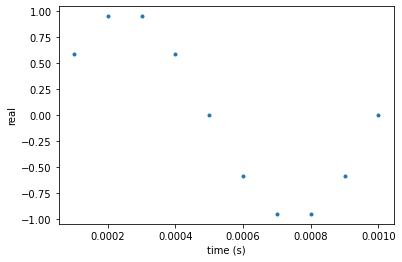

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(theta, s, '.')
ax.plot(t[0:10], s[0:10], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [ ]:
ipd.Audio(s, rate=sr)

In [ ]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

Text(0.5, 0, 'imag')

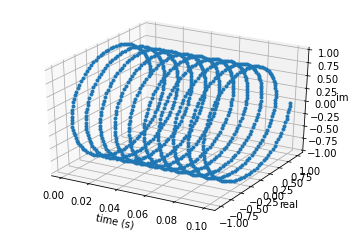

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:1000], c.real[0:1000], c.imag[0:1000]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.show()

In [ ]:
ipd.Audio(s, rate=sr)

# Generate pulse train

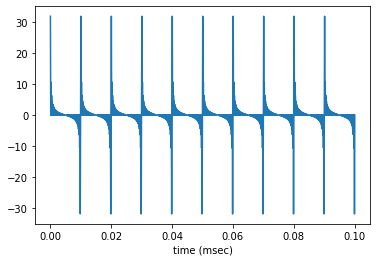

In [ ]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [ ]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [ ]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [ ]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [ ]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [ ]:
nFFT = nSamp
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z)))

Text(0, 0.5, 'amplitude')

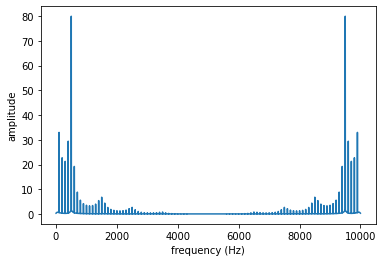

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

# define helper functions

In [ ]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [ ]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c2140e358>)

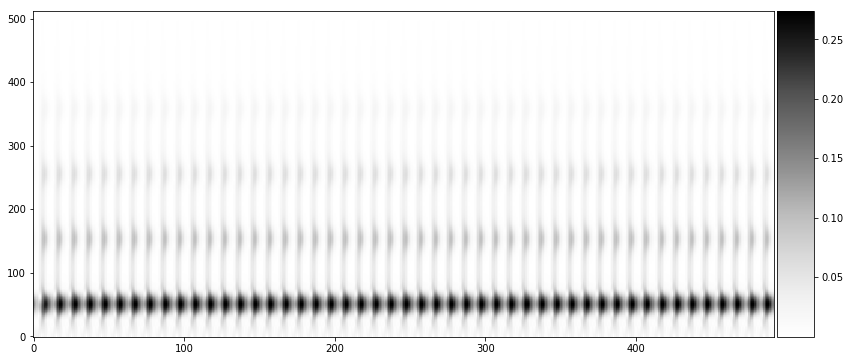

In [ ]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)

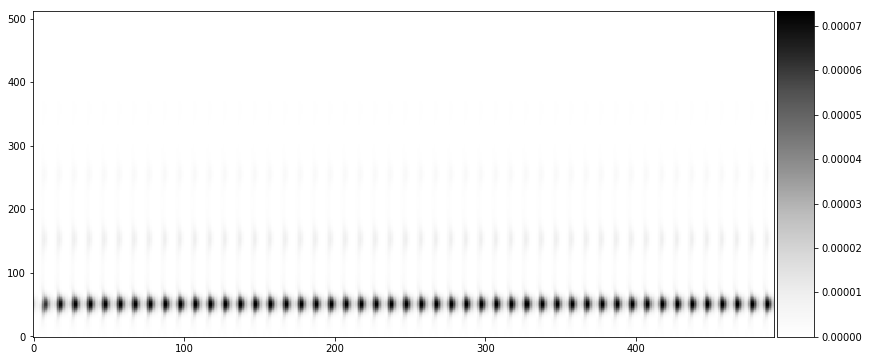

In [ ]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);

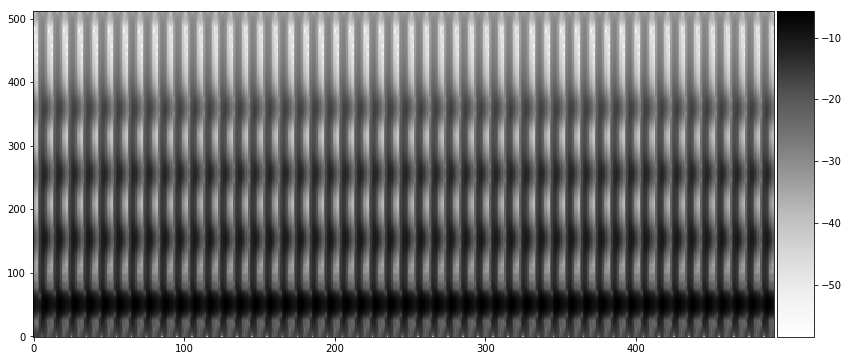

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);

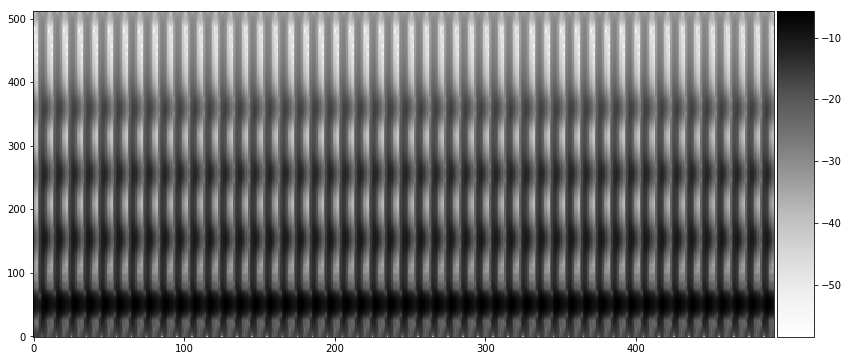

In [ ]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);